In [1]:
#spreading.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 18 October 2017.
#simulate the viscous radial spreading of an initially narrow circular ringlet

In [2]:
#restore output
from helper_fns import *
execfile('inputs.py')
r, t, vr, vt, times, monitor = restore_output(output_folder)
a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
print 'r.shape = ', r.shape
print 'total_ring_mass = ', total_ring_mass
print 'shear_viscosity = ', shear_viscosity
print 'bulk_viscosity = ', bulk_viscosity
print 'initial_orbits = ', initial_orbits
print 'confine_inner_edge = ', confine_inner_edge
print 'confine_outer_edge = ', confine_outer_edge
print 'e.min() = ', e.min()
print 'e.max() = ', e.max()
print 'execution time (min) = ', (monitor['current_time'] - monitor['start_time'])/60.0
print 'monitor = ', monitor

r.shape =  (1001, 15, 3)
total_ring_mass =  2e-09
shear_viscosity =  1e-12
bulk_viscosity =  1e-12
initial_orbits =  {'shape': 'circular'}
confine_inner_edge =  True
confine_outer_edge =  False
e.min() =  0.0
e.max() =  1.0429549223029082e-07
execution time (min) =  44.8666666667
monitor =  {'current_time': 1694834695, 'streamline_crossing_timestep': None, 'start_time': 1694832003, 'modified_params': None, 'nan_timestep': None, 'current_timestep': 2100000, 'self_interacting': True}


In [3]:
#time in units of viscous timescale
viscous_timescale = (radial_width**2)/(12*shear_viscosity)
print 'viscous_timescale = ', viscous_timescale
times_viscous = times/viscous_timescale

viscous_timescale =  20833.3333333


In [4]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set(font_scale=1.5, font='DejaVu Sans')
import numpy as np

In [5]:
#inner, outer, and average streamline's orbit elements
a_inner = a[:, 0, :].mean(axis=1)
a_outer = a[:, number_of_streamlines-1, :].mean(axis=1)
a_avg = (a_inner + a_outer)/2
e_inner = e[:, 0, :].mean(axis=1)
e_outer = e[:, number_of_streamlines-1, :].mean(axis=1)
e_avg = (e_inner + e_outer)/2
delta_a = a_outer - a_inner

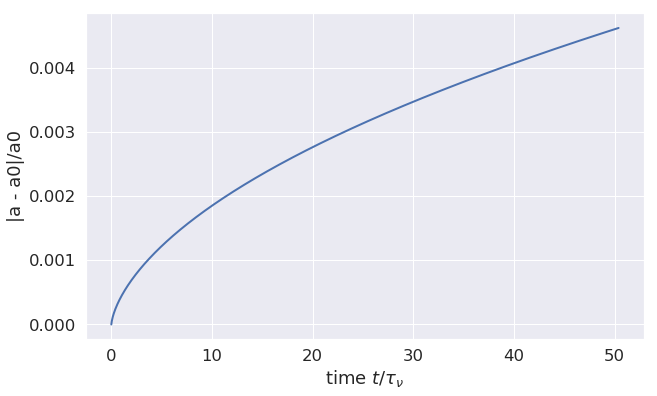

In [6]:
#plot fractional change in a_outer
a0 = a_outer[0]
y = np.abs((a_outer - a0)/a0)
x = times_viscous
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=1)
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel('|a - a0|/a0')

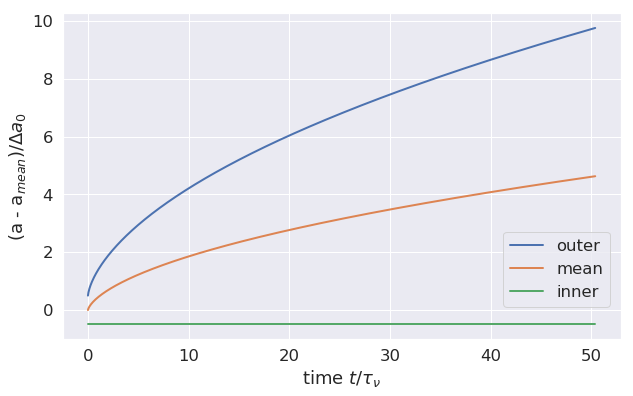

In [7]:
#plot streamline's mutual a-evolution
twopi = 2*np.pi
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = (a_outer - a_avg[0])/delta_a[0]
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=1, label='outer')
y = (a_avg - a_avg[0])/delta_a[0]
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=1, label='mean')
y = (a_inner - a_avg[0])/delta_a[0]
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=1, label='inner')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel('(a - a$_{mean})/\Delta a_0$')
p = ax.legend(loc=(0.79, 0.1))

initial delta_a =  0.0005000000000009441


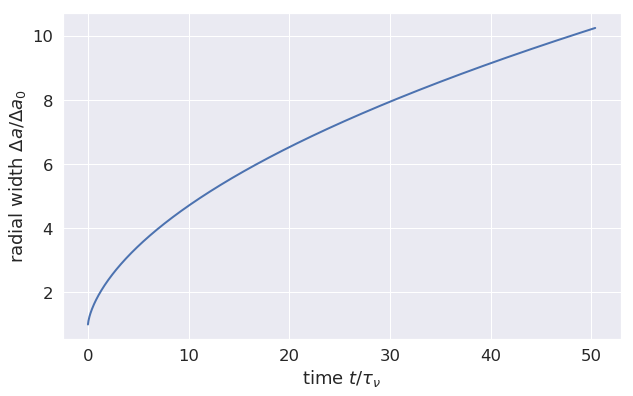

In [8]:
#plot delta_a versus time
delta_a = a_outer - a_inner
print 'initial delta_a = ', delta_a[0]
x = times_viscous
y = delta_a/delta_a[0]
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=2)
p = ax.set_ylabel(r'radial width $\Delta a/\Delta a_0$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')

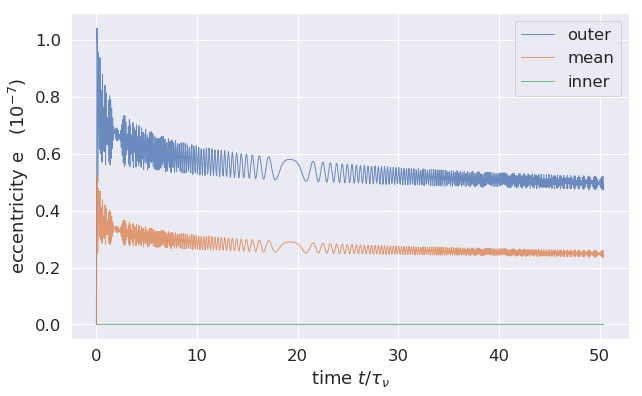

In [9]:
#plot streamline's e-evolution
twopi = 2*np.pi
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = e_outer/1.0e-7
p = ax.plot(x, y, linestyle='-', linewidth=1, alpha=0.8, label='outer')
y = e_avg/1.0e-7
p = ax.plot(x, y, linestyle='-', linewidth=1, alpha=0.8, label='mean')
y = e_inner/1.0e-7
p = ax.plot(x, y, linestyle='-', linewidth=1, alpha=0.8, label='inner')
p = ax.set_ylabel(r'eccentricity e   ($10^{-7}$)')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.legend()

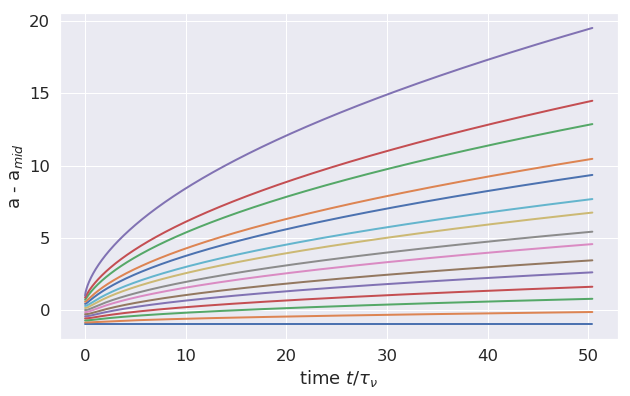

In [10]:
#plot r(time)
twopi = 2*np.pi
f, ax = plt.subplots(figsize=(10, 6))
a_avg = a.mean(axis=2)                    #average a across longitude
a_0 = a_avg[0].mean()
da_0 = (a_avg[0][-1] - a_avg[0][0])/2
for pidx in range(number_of_streamlines):
    da = (a_avg[:, pidx] - a_0)/da_0
    p = ax.plot(times_viscous, da, linestyle='-', linewidth=2)
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel('a - a$_{mid}$')

In [11]:
#compute system's total_angular_momentum in barycentric reference frame
mass_0 = 1.0
particle_mass = total_ring_mass/(number_of_streamlines*particles_per_streamline)
ring_angular_momentum = []
planet_angular_momentum = []
for idx, tm in enumerate(times):
    r_now = r[idx]
    t_now = t[idx]
    vr_now = vr[idx]
    vt_now = vt[idx]
    r_bc, t_bc, vr_bc, vt_bc, r_0, t_0, vr_0, vt_0 = planeto2bary(total_ring_mass, r_now, t_now, vr_now, vt_now)
    l_0 = mass_0*r_0*vt_0
    l_ring = + np.sum(particle_mass*r_bc*vt_bc)
    ring_angular_momentum += [l_ring]
    planet_angular_momentum += [l_0]
ring_angular_momentum = np.array(ring_angular_momentum)
print 'mean ring_angular_momentum = ', ring_angular_momentum.mean()
planet_angular_momentum = np.array(planet_angular_momentum)
print 'mean planet_angular_momentum = ', planet_angular_momentum.mean()
total_angular_momentum = ring_angular_momentum + planet_angular_momentum
delta_L = (total_angular_momentum - total_angular_momentum[0])/total_angular_momentum[0]
print 'max delta_L = ', delta_L.max()

mean ring_angular_momentum =  2.0050158296673808e-09
mean planet_angular_momentum =  2.6542348269746757e-34
max delta_L =  0.0008134274392889385


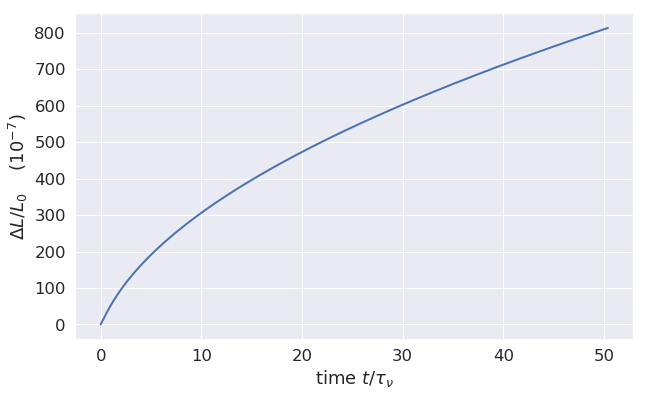

In [12]:
#plot delta_total_angular_momentum over time
factor = 1.0e-6
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = delta_L/factor
p = ax.plot(x, y, linestyle='-', linewidth=2, label='total')
p = ax.set_ylabel(r'$\Delta L/L_0$    $(10^{-7})$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')

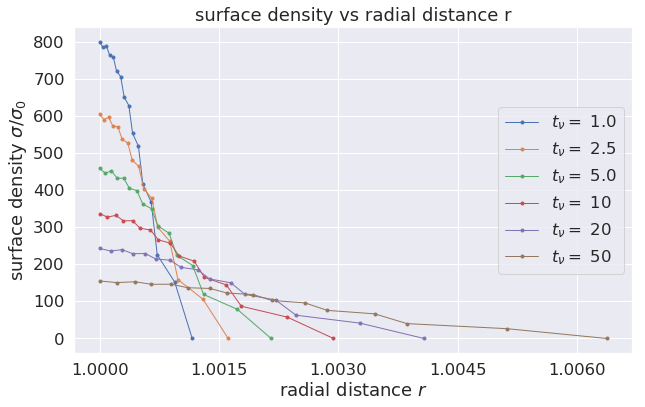

In [13]:
#plot sigma(r) at selected times
plot_times = [1.0, 2.5, 5.0, 10.0, 20.0, 50.0]
R = r[0].mean()
sd_init = total_ring_mass/np.pi/(R**2)
f, ax = plt.subplots(figsize=(10, 6))
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
sns.set(font_scale=1.5, font='DejaVu Sans')
for idx, plot_time in enumerate(plot_times):
    t_idx = np.where(times_viscous >= plot_time)[0][0]
    r_2D = r[t_idx]
    t_2D = t[t_idx]
    vr_2D = vr[t_idx]
    vt_2D = vt[t_idx]
    lambda_ = get_lambda(total_ring_mass, number_of_streamlines, J2, Rp, r_2D, t_2D, vr_2D, vt_2D)
    delta_r = delta_f(r_2D, t_2D)
    sd_2D = surface_density(lambda_, delta_r)
    r_1D = r_2D.mean(axis=1)
    sd_1D = sd_2D.mean(axis=1)
    dr_in = r_1D[1] - r_1D[0]
    dr_out = r_1D[-1] - r_1D[-2]
    r_padded = np.array(r_1D.tolist() + [r_1D[-1] + dr_out])
    sd_padded = np.array(sd_1D.tolist() + [0.0])
    lbl = r'$t_\nu=$ ' + str(times_viscous[t_idx])[0:3]
    if (lbl[-1] == '.'): lbl=lbl.strip('.')
    ax.plot(r_padded, sd_padded/sd_init, marker='o', markersize=3, linestyle='-', linewidth=1, alpha=1.0, 
        color=colors[idx], label=lbl)
p = ax.set_title(r'surface density vs radial distance r')
p = ax.set_xlabel(r'radial distance $r$')
p = ax.set_ylabel(r'surface density $\sigma/\sigma_0$')
p = ax.xaxis.set_major_locator(plt.MaxNLocator(5))
p = plt.legend(loc='center right')